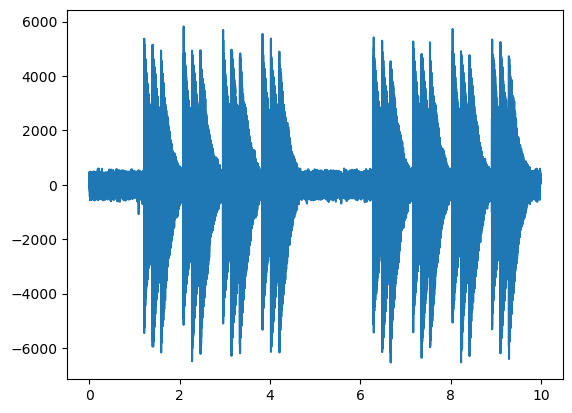

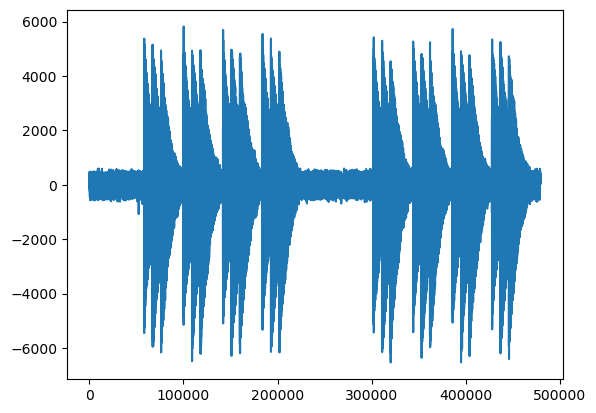

In [33]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

x = np.arange(data.shape[0]) / RATE
plt.plot(x, data)
plt.show() # 横軸:時間(sec)
x = [i for i in range(len(data))]
plt.plot(x, data)
plt.show() # 横軸:データ点インデックス


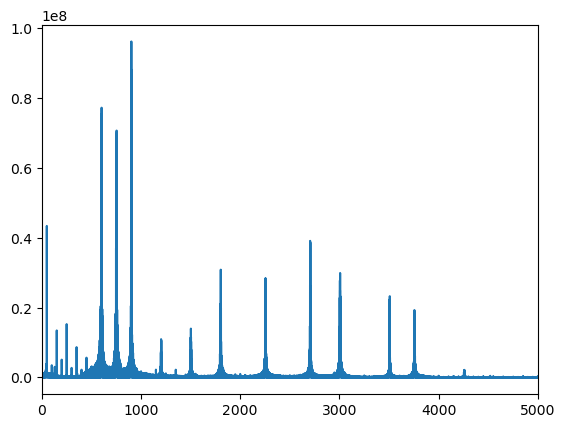

In [34]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


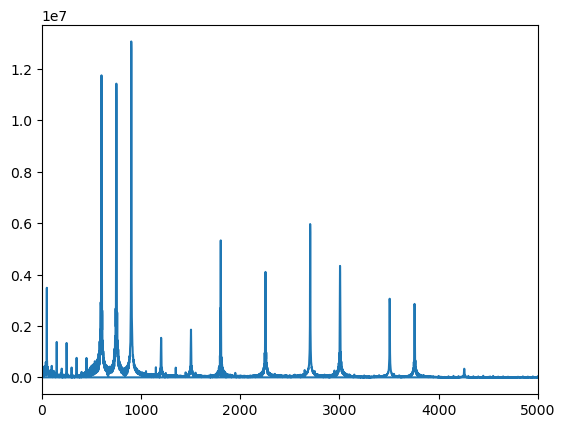

In [46]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 58000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


In [53]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 58000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)

df = pd.DataFrame(dict(freq = freqList, amp = fft_data))
df = df[df['freq']>500] # 500 Hz以下は無視する。
df = df[df['amp']>5000000] # 2800000以上の強度を持つ点を覚える。
print(list(df.index))
# [510, 511, 512, 513, 514, 515, 516, 639, 640, 641, 642, 643, 644, 768, 769, 770, 771, 1539, 2308, 2309]
print(list(df['freq']))
# [597.65625, 598.828125, 600.0, 601.171875, 602.34375, 603.515625, 604.6875, 748.828125, 750.0, 751.171875, 752.34375, 753.515625, 754.6875, 900.0, 901.171875, 902.34375, 903.515625, 1803.515625, 2704.6875, 2705.859375]
print(len(df))
# 20


[510, 511, 512, 513, 514, 515, 516, 639, 640, 641, 642, 643, 644, 768, 769, 770, 771, 1539, 2308, 2309]
[597.65625, 598.828125, 600.0, 601.171875, 602.34375, 603.515625, 604.6875, 748.828125, 750.0, 751.171875, 752.34375, 753.515625, 754.6875, 900.0, 901.171875, 902.34375, 903.515625, 1803.515625, 2704.6875, 2705.859375]
20


In [56]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

# ここに先ほどの結果を入れる
freq_indices = [510, 511, 512, 513, 514, 515, 516, 639, 640, 641, 642, 643, 644, 768, 769, 770, 771, 1539, 2308, 2309]

start = 58000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度

amp = 0
for i in freq_indices:
    amp += fft_data[i]

print('{:.2e}'.format(amp))
# 1.74e+08


1.74e+08
